# Table of Contents

1. **[Introduction](#1)**
2. **[Data Loading and cleanning](#2)**
3. **[Exploratory Data Analysis](#3)**
4. **[Data Preprocessing](#4)**
5. **[Modeling](#5)**
6. **[Evaluation](#7)**

#1. Introduction

- Saat ini perusahaan dalam  memvalidasi kelayakan pinjaman masih melakukan validasi secara manual sehingga memakan waktu yang lama.
- Oleh karena itu, perusahaan ingin mengotomatisasi proses kelayakan pinjaman berdasarkan informasi pelanggan dan mengidentifikasi faktor/segmen pelanggan yang memenuhi syarat untuk mengambil pinjaman.
- Mengurangi human error dalam validasi kelayakan pinjaman yang menyebabkan calon konsumen yang tidak eligible lolos sehingga menyebabkan credit macet.
- Semakin akurat kita dalam memprediksi pelanggan yang memenuhi syarat, semakin bermanfaat bagi perusahaan.

#2. Data Loading and cleanning

In [489]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize']=(8,6)
sns.set_style('darkgrid')


In [490]:
from google.colab import files
uploaded = files.upload()
print ('Data read into a pandas dataframe!')

Saving Test_Loan_Home.csv to Test_Loan_Home (7).csv
Saving Train_Loan_Home.csv to Train_Loan_Home (7).csv
Data read into a pandas dataframe!


In [491]:
df=pd.read_csv(io.BytesIO(uploaded['Train_Loan_Home.csv']))
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [492]:
df_test=pd.read_csv(io.BytesIO(uploaded['Test_Loan_Home.csv']))
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncomeMonthly,CoapplicantIncomeMonthly,LoanAmountThousands,Loan_Amount_Term_Months,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Understanding the Data

In [493]:
df.shape,df_test.shape

((614, 13), (367, 12))

The training dataset has 614 rows and 13 columns and the test dataset has 367 rows and 12 columns

**Information about the training and test dataset**

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [495]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_ID                   367 non-null    object 
 1   Gender                    356 non-null    object 
 2   Married                   367 non-null    object 
 3   Dependents                357 non-null    object 
 4   Education                 367 non-null    object 
 5   Self_Employed             344 non-null    object 
 6   ApplicantIncomeMonthly    367 non-null    int64  
 7   CoapplicantIncomeMonthly  367 non-null    int64  
 8   LoanAmountThousands       362 non-null    float64
 9   Loan_Amount_Term_Months   361 non-null    float64
 10  Credit_History            338 non-null    float64
 11  Property_Area             367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**Checking the Data types of each features**

In [496]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [497]:
df_test.dtypes

Loan_ID                      object
Gender                       object
Married                      object
Dependents                   object
Education                    object
Self_Employed                object
ApplicantIncomeMonthly        int64
CoapplicantIncomeMonthly      int64
LoanAmountThousands         float64
Loan_Amount_Term_Months     float64
Credit_History              float64
Property_Area                object
dtype: object

**Checking for null values**

In [498]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [499]:
df_test.isnull().sum()

Loan_ID                      0
Gender                      11
Married                      0
Dependents                  10
Education                    0
Self_Employed               23
ApplicantIncomeMonthly       0
CoapplicantIncomeMonthly     0
LoanAmountThousands          5
Loan_Amount_Term_Months      6
Credit_History              29
Property_Area                0
dtype: int64

**Heatmap to identify the features having null values**

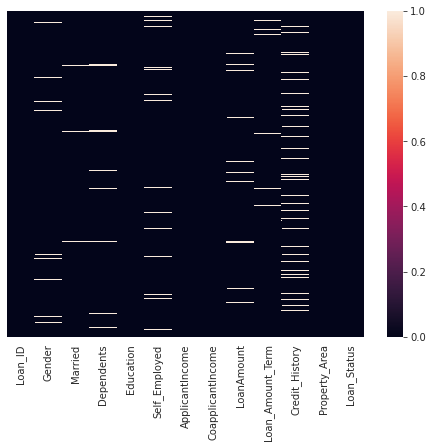

In [500]:
sns.heatmap(df.isnull(),yticklabels=False)

#3. Exploratory Data Analysis

In [501]:
#dropping the unnecessary column
df.drop('Loan_ID',axis=1,inplace=True)
df_test_id=df_test['Loan_ID']
df_test.drop('Loan_ID',axis=1,inplace=True)

In [502]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [503]:
#separating all the categorical features and numerical features
categorical_features=[]
numerical_features=[]
for i in X.columns.tolist():
    if X[i].dtype=='object':
        categorical_features.append(i)
    else:
        numerical_features.append(i)

In [504]:
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [505]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Univariate Analysis

In [506]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Text(0.5, 0, 'Loan Status')

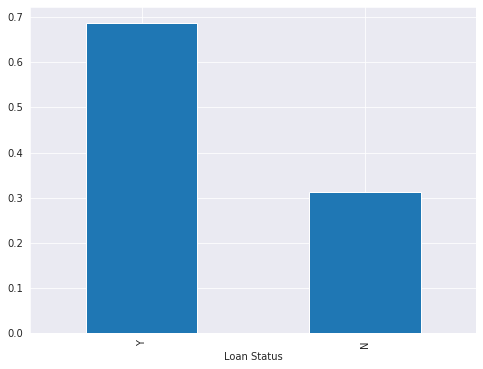

In [507]:
df['Loan_Status'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Loan Status')

**Di antara 614 pelanggan, pinjaman yang disetujui sebanyak 422 pelanggan (~70%)**

Feature:  Gender
Male      0.813644
Female    0.186356
Name: Gender, dtype: float64


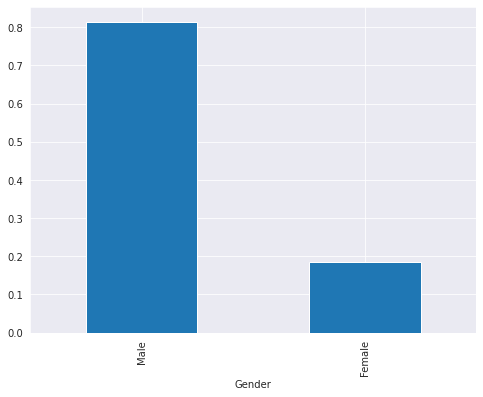



Feature:  Married
Yes    0.651391
No     0.348609
Name: Married, dtype: float64


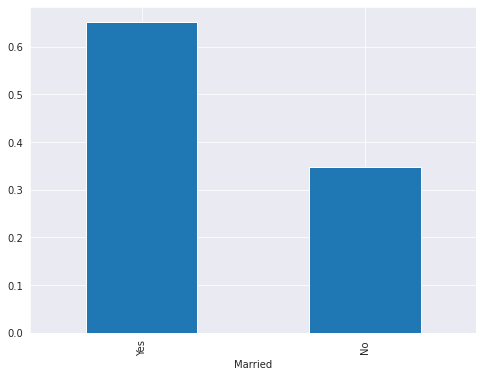



Feature:  Dependents
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64


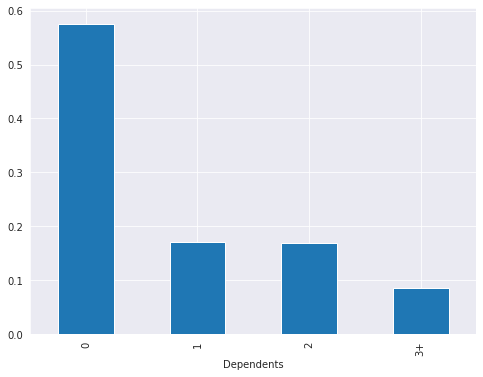



Feature:  Education
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64


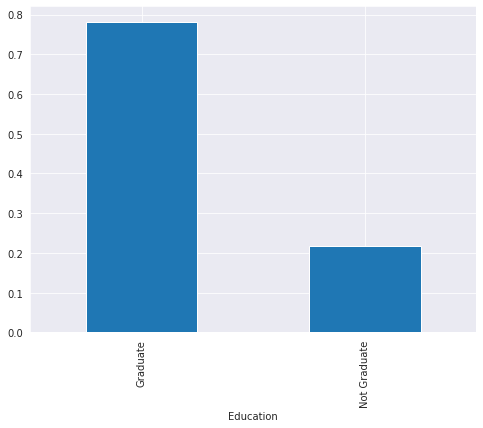



Feature:  Self_Employed
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64


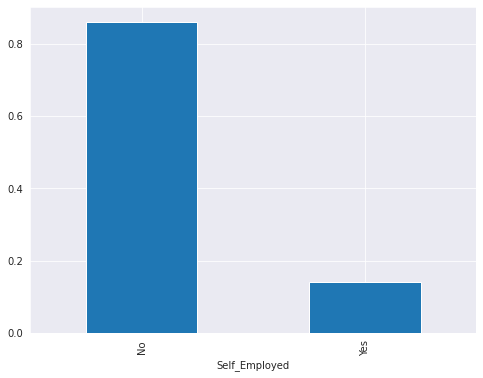



Feature:  Property_Area
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64


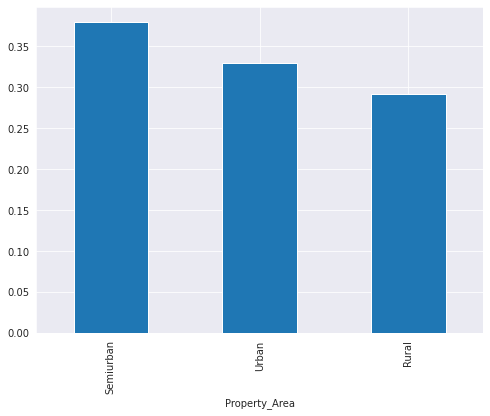

In [508]:
for i in categorical_features:
    print('Feature: ',i)
    print(X[i].value_counts(normalize=True))
    X[i].value_counts(normalize=True).plot(kind='bar')
    plt.xlabel(i)
    plt.show()
    print('\n')

Dari visualisasi di atas dapat disimpulkan bahwa:
1. Sekitar 81% pelanggan adalah Pria.
2. 65% pelanggan Menikah.
3. Sebagian besar nasabah tidak memiliki tanggungan.
4. 78% pelanggan adalah yang edukasinya graduate (berpendidikan).
5. Hanya 14% pelanggan yang bekerja sendiri.
6. 38% pelanggan berasal dari daerah semi-perkotaan, 33% dari daerah perkotaan, 29% dari daerah pedesaan

**Numerical Features**

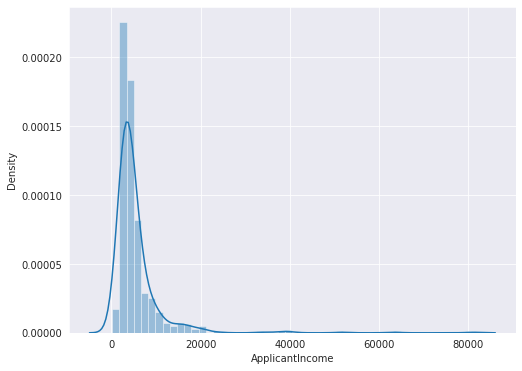

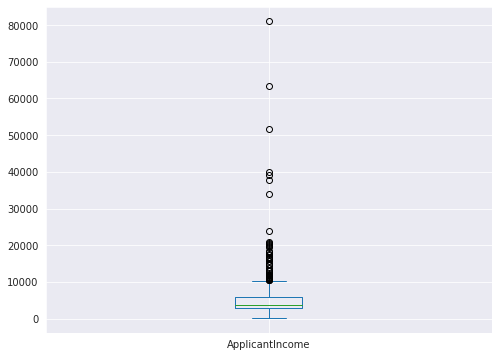

In [509]:
sns.distplot(X['ApplicantIncome'],bins=50,kde=True)
plt.show()
X['ApplicantIncome'].plot(kind='box')
plt.show()

Dari visualisasi di atas dapat disimpulkan bahwa:
1. Fitur Pendapatan Pemohon tidak mengikuti distribusi normal, Sebagian Besar Pendapatan berkisar antara 0-20.000
2. Boxplot pasti menunjukkan bahwa fitur tersebut memiliki banyak Outlier. Hal ini disebabkan oleh label pendapatan yang berbeda dari pelanggan yang berbeda.
  Kami dapat mengelompokkan pendapatan pelanggan dengan label pendidikan mereka

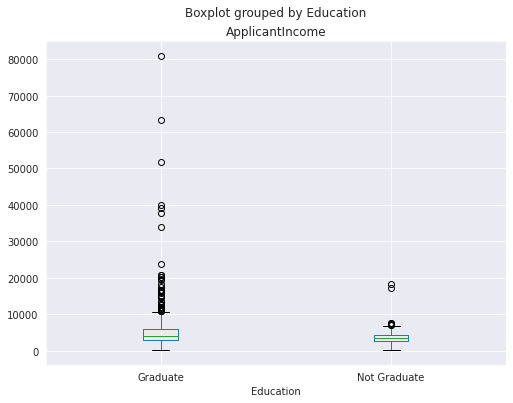

In [510]:
X.boxplot(column='ApplicantIncome',by='Education')

Sebagian besar Pelanggan yang lulusan akademik memiliki pendapatan yang sangat tinggi

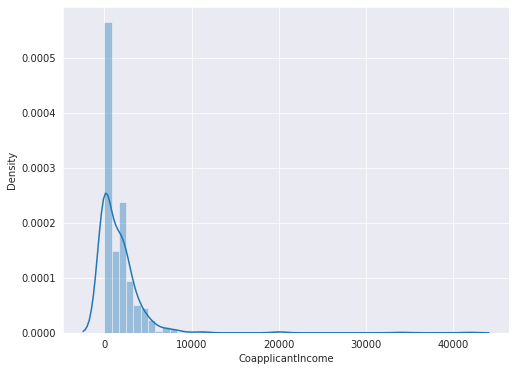

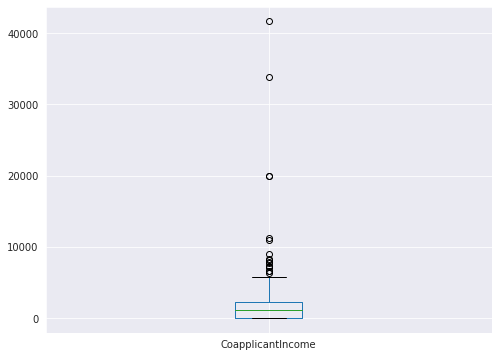

In [511]:
sns.distplot(X['CoapplicantIncome'],kde=True)
plt.show()
X.boxplot(column='CoapplicantIncome')
plt.show()

1. Fitur ini memiliki Right Skewed Distribution dan sebagian besar CoapplicantIncome berkisar antara 0-6000
2. Fitur ini memiliki beberapa outlier

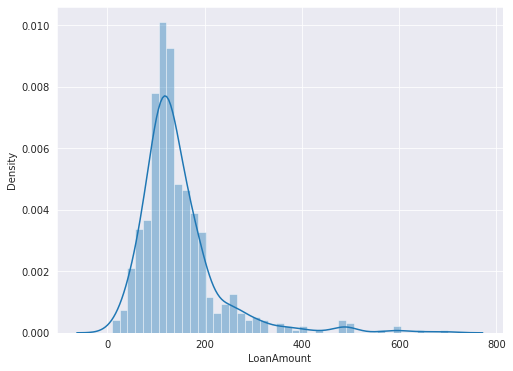

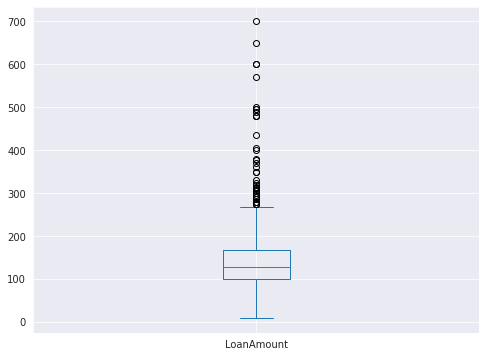

In [512]:
sns.distplot(X['LoanAmount'],kde=True)
plt.show()
X['LoanAmount'].plot(kind='box')
plt.show()

Fitur LoanAmount mengikuti Right Skewed Distribution dan memiliki banyak Outlier

Text(0.5, 0, 'Loan Amount Term')

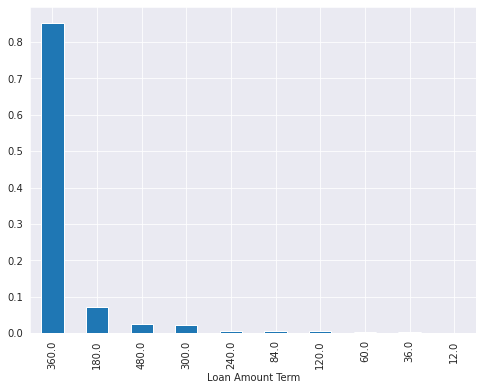

In [513]:
X['Loan_Amount_Term'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Loan Amount Term')

Sekitar 85% pinjaman memiliki 360 sebagai loan amount term

# Bivariate Analysis

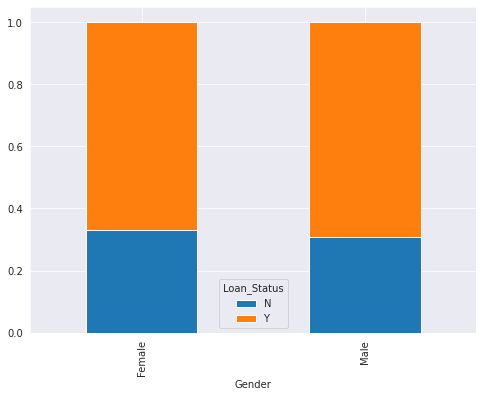

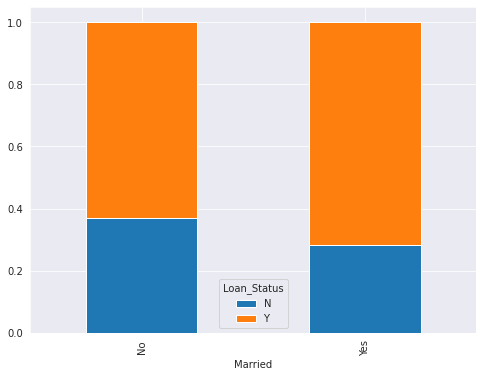

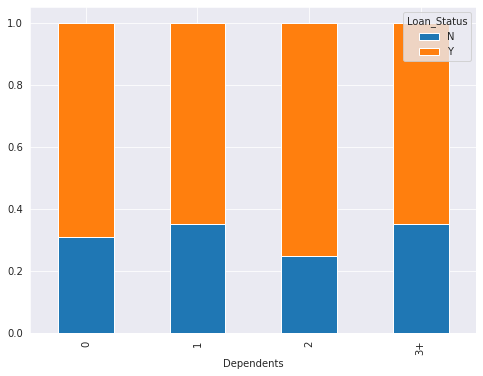

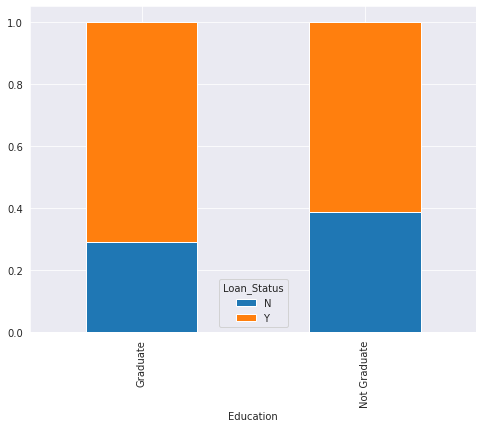

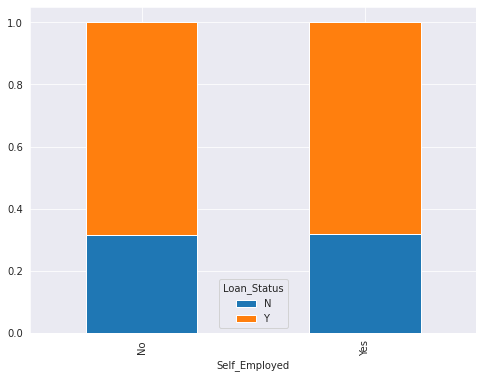

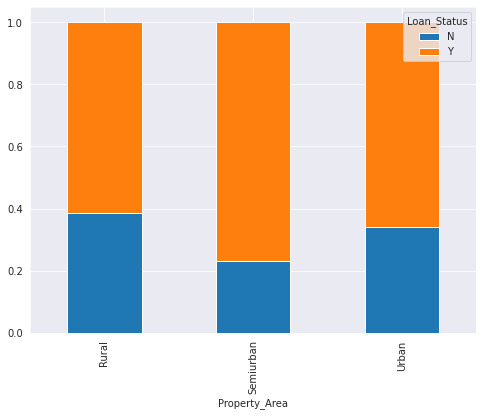

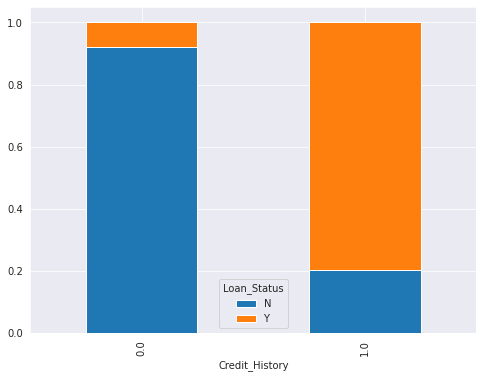

In [514]:
gender=pd.crosstab(df['Gender'],df['Loan_Status'])
gender.div(gender.sum(axis=1),axis=0).plot(kind='bar',stacked=True)
plt.show()
married=pd.crosstab(df['Married'],df['Loan_Status'])
married.div(married.sum(axis=1),axis=0).plot(kind='bar',stacked=True)
plt.show()
dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
dependents.div(dependents.sum(axis=1),axis=0).plot(kind='bar',stacked=True)
plt.show()
education=pd.crosstab(df['Education'],df['Loan_Status'])
education.div(education.sum(axis=1),axis=0).plot(kind='bar',stacked=True)
plt.show()
self_employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
self_employed.div(self_employed.sum(axis=1),axis=0).plot(kind='bar',stacked=True)
plt.show()
property_area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
property_area.div(property_area.sum(axis=1),axis=0).plot(kind='bar',stacked=True)
plt.show()
credit_history=pd.crosstab(df['Credit_History'],df['Loan_Status'])
credit_history.div(credit_history.sum(axis=1),axis=0).plot(kind='bar',stacked=True)
plt.show()

Dari visualisasi di atas, poin-poin berikut dapat disimpulkan:
1. Persentase pelanggan wanita dan pria yang mendapatkan persetujuan pinjaman sama.
2. Pelanggan yang sudah menikah kemungkinan besar untuk mendapatkan persetujuan pinjaman.
3. Nasabah yang memiliki tanggungan 1 dan 3+ memiliki kesempatan lebih besar untuk mendapatkan persetujuan pinjaman.
4. Pelanggan lulusan akademik lebih mungkin untuk mendapatkan persetujuan pinjaman.
5. Persentase pelanggan yang bekerja sendiri dan tidak bekerja, mendapatkan persetujuan pinjaman adalah sama.
6. Nasabah dari daerah semi urban memiliki kesempatan lebih besar untuk mendapatkan persetujuan pinjaman.
7. Pelanggan dengan skor kredit 1 lebih mungkin untuk mendapatkan persetujuan pinjaman.

#4. Data Preprocessing

# Handling Missing Values

In [515]:
print('Missing Values: ')
df.isnull().sum()

Missing Values: 


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Untuk menangani nilai null:
1. Untuk Fitur Categorical nilai null akan diganti dengan nilai mode.
2. Untuk fitur Numerical nilai null akan diganti dengan mean atau nilai median.

In [516]:
X["Gender"].replace(np.nan,X['Gender'].mode()[0],inplace=True)
X['Married'].replace(np.nan,X['Married'].mode()[0],inplace=True)
X['Dependents'].replace(np.nan,X['Dependents'].mode()[0],inplace=True)
X['Self_Employed'].replace(np.nan,X['Self_Employed'].mode()[0],inplace=True)
X['Loan_Amount_Term'].replace(np.nan,X['Loan_Amount_Term'].mode()[0],inplace=True)
X['Credit_History'].replace(np.nan,X['Credit_History'].mode()[0],inplace=True)


Karena fitur Loan Amount memiliki banyak outlier, kami akan mengganti nilai null dengan median

In [517]:
X['LoanAmount'].replace(np.nan,X['LoanAmount'].median(),inplace=True)

In [518]:
X.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

**Semua nilai null telah dihapus**

# Outlier Treatment


Karena fitur Loan Amount mengikuti right skewed distribution, kami akan melakukan transformasi log untuk mendapatkan distribusi normal, karena model akan memberikan kinerja yang lebih baik pada distribusi normal
Transformasi log yang sama akan diterapkan pada data pengujian

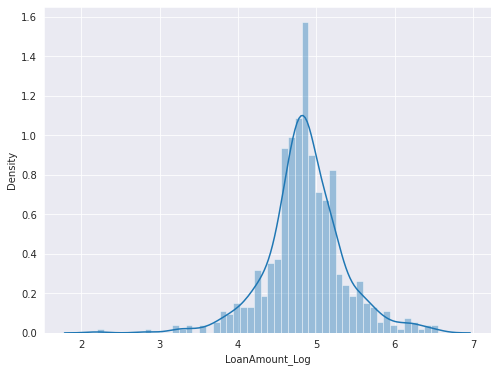

In [519]:
X['LoanAmount_Log']=np.log(X['LoanAmount'])
sns.distplot(X['LoanAmount_Log'],bins=50)

The log transformation of the Loan Amount feature follows normal distribution

In [520]:
#dropping the Loan Amount feature
X.drop('LoanAmount',axis=1,inplace=True)

# Feature Engineering

# Converting all the categorical varibales into numerical varibales

In [521]:
categorical_features=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Amount_Term',
 'Credit_History']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_features:
    X[i]=le.fit_transform(X[i])

In [522]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Log
0,1,0,0,0,0,5849,0.0,8,1,2,4.852030
1,1,1,1,0,0,4583,1508.0,8,1,0,4.852030
2,1,1,0,0,1,3000,0.0,8,1,2,4.189655
3,1,1,0,1,0,2583,2358.0,8,1,2,4.787492
4,1,0,0,0,0,6000,0.0,8,1,2,4.948760


# Feature Selection

# Correlation Matrix

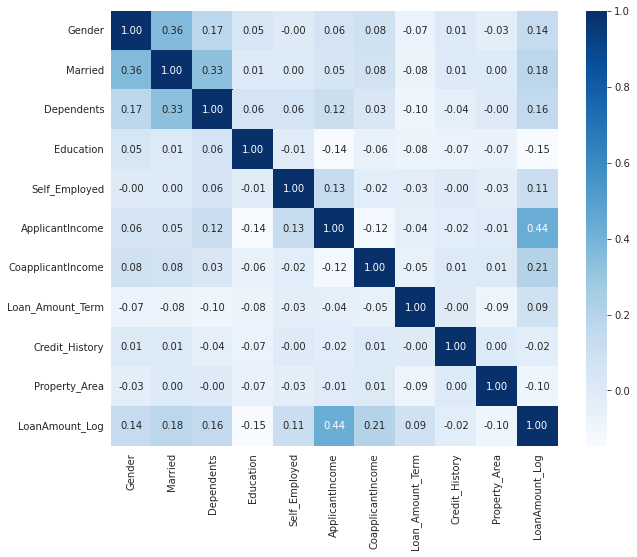

In [523]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='Blues')

# Feature Importance

In [524]:

etc=ExtraTreesClassifier(n_estimators=100)
etc.fit(X,y)
values=pd.Series(etc.feature_importances_)

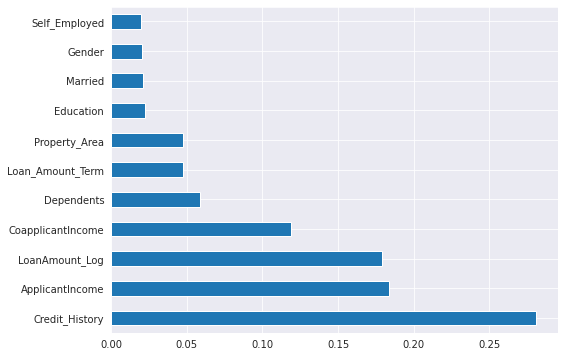

In [525]:
values.index=X.columns
values.sort_values(ascending=False).plot(kind='barh')

Dari diagram di atas jelas bahwa Credit History merupakan fitur terpenting dalam dataset yang berarti nasabah yang telah melunasi utang sebelumnya memiliki peluang lebih besar untuk mendapatkan persetujuan pinjaman.

# Normalization of the Dataset

In [526]:

X_norm=StandardScaler().fit_transform(X)
X_norm[0:5]

array([[ 0.47234264, -1.37208932, -0.73780632, -0.52836225, -0.39260074,
         0.07299082, -0.55448733,  0.29977577,  0.41173269,  1.22329839,
        -0.01053273],
       [ 0.47234264,  0.72881553,  0.25346957, -0.52836225, -0.39260074,
        -0.13441195, -0.03873155,  0.29977577,  0.41173269, -1.31851281,
        -0.01053273],
       [ 0.47234264,  0.72881553, -0.73780632, -0.52836225,  2.54711697,
        -0.39374734, -0.55448733,  0.29977577,  0.41173269,  1.22329839,
        -1.34706757],
       [ 0.47234264,  0.72881553, -0.73780632,  1.89264089, -0.39260074,
        -0.46206247,  0.2519796 ,  0.29977577,  0.41173269,  1.22329839,
        -0.14075792],
       [ 0.47234264, -1.37208932, -0.73780632, -0.52836225, -0.39260074,
         0.09772844, -0.55448733,  0.29977577,  0.41173269,  1.22329839,
         0.18464737]])

#5. Modeling

The following steps to be followed:
1. Apply all the changes in test dataset
2. Separate the training dataset into train data and validation data
3. Apply different Machine Learning Classification Algorithm to train the data
4. Check the performance matrix based on the output of the Validation dataset
5. Apply the best Model into the test data

# Applying all the changes in the Test dataset

In [527]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncomeMonthly,CoapplicantIncomeMonthly,LoanAmountThousands,Loan_Amount_Term_Months,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban



ApplicantIncomeMonthly,CoapplicantIncomeMonthly,LoanAmountThousands,Loan_Amount_Term_Months keempat fitur ini tidak memiliki nama yang sama dalam data training. Jadi, ganti nama fitur dengan nama yang sama di data training


In [528]:
df_test.rename(columns={'ApplicantIncomeMonthly':'ApplicantIncome','CoapplicantIncomeMonthly':'CoapplicantIncome','LoanAmountThousands':'LoanAmount','Loan_Amount_Term_Months':'Loan_Amount_Term'},inplace=True)

In [529]:
df_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [530]:
df_test['Gender'].replace(np.nan,df_test['Gender'].mode()[0],inplace=True)
df_test['Dependents'].replace(np.nan,df_test['Dependents'].mode()[0],inplace=True)
df_test['Self_Employed'].replace(np.nan,df_test['Self_Employed'].mode()[0],inplace=True)
df_test['LoanAmount'].replace(np.nan,df_test['LoanAmount'].median(),inplace=True)
df_test['Loan_Amount_Term'].replace(np.nan,df_test['Loan_Amount_Term'].mode()[0],inplace=True)
df_test['Credit_History'].replace(np.nan,df_test['Credit_History'].mode()[0],inplace=True)

In [531]:
df_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [532]:
for i in categorical_features:
    df_test[i]=LabelEncoder().fit_transform(df_test[i])
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,10,1,2
1,1,1,1,0,0,3076,1500,126.0,10,1,2
2,1,1,2,0,0,5000,1800,208.0,10,1,2
3,1,1,2,0,0,2340,2546,100.0,10,1,2
4,1,0,0,1,0,3276,0,78.0,10,1,2


In [533]:
df_test['LoanAmount_log']=np.log(df_test['LoanAmount'])
df_test.drop('LoanAmount',axis=1,inplace=True)
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,1,1,0,0,0,5720,0,10,1,2,4.700480
1,1,1,1,0,0,3076,1500,10,1,2,4.836282
2,1,1,2,0,0,5000,1800,10,1,2,5.337538
3,1,1,2,0,0,2340,2546,10,1,2,4.605170
4,1,0,0,1,0,3276,0,10,1,2,4.356709


In [534]:
df_test_norm=StandardScaler().fit_transform(df_test)
df_test_norm[0:5]

array([[ 0.48547939,  0.75835829, -0.75822199, -0.5448117 , -0.33484506,
         0.1864605 , -0.67333511,  0.30677633,  0.4376739 ,  1.11876379,
        -0.30445573],
       [ 0.48547939,  0.75835829,  0.18187082, -0.5448117 , -0.33484506,
        -0.35269225, -0.02984821,  0.30677633,  0.4376739 ,  1.11876379,
         0.02228726],
       [ 0.48547939,  0.75835829,  1.12196363, -0.5448117 , -0.33484506,
         0.0396413 ,  0.09884917,  0.30677633,  0.4376739 ,  1.11876379,
         1.22832616],
       [ 0.48547939,  0.75835829,  1.12196363, -0.5448117 , -0.33484506,
        -0.50277411,  0.41887666,  0.30677633,  0.4376739 ,  1.11876379,
        -0.53377517],
       [ 0.48547939, -1.31863792, -0.75822199,  1.83549656, -0.33484506,
        -0.31190914, -0.67333511,  0.30677633,  0.4376739 ,  1.11876379,
        -1.13158141]])

# Training and Validation Data Split

In [535]:

x_train,x_val,y_train,y_val=train_test_split(X_norm,y,test_size=0.25,random_state=42)
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((460, 11), (460,), (154, 11), (154,))

The following models will the applied on the training data:
1. Logistic Regression
2. Random Forest Classifier
3. Xgboost Classifier

In [536]:
accuracy=[]
f1=[]
model=[]

# Logistic Regression

In [537]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_hat=lr.predict(x_val)

In [538]:
accuracy.append(np.round(accuracy_score(y_val,y_hat),2))
f1.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model.append('Logistic Regression')

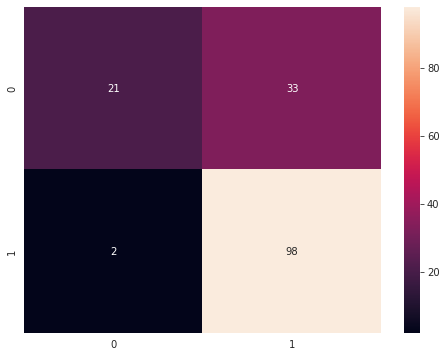

In [539]:
sns.heatmap(confusion_matrix(y_val,y_hat),annot=True,fmt='.0f')

# Random Forest Classifier

In [540]:

rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
y_hat=rfc.predict(x_val)

In [541]:
accuracy.append(np.round(accuracy_score(y_val,y_hat),2))
f1.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model.append('Random Forest')

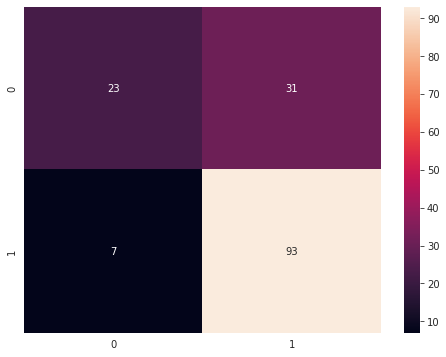

In [542]:
sns.heatmap(confusion_matrix(y_val,y_hat),annot=True,fmt='.0f')

# Xgboost

In [543]:

xgb=XGBClassifier(n_estimators=100,max_depth=3)
xgb.fit(x_train,y_train)
y_hat=xgb.predict(x_val)

In [544]:
accuracy.append(np.round(accuracy_score(y_val,y_hat),2))
f1.append(np.round(f1_score(y_val,y_hat,average='weighted'),2))
model.append('Xgboost')

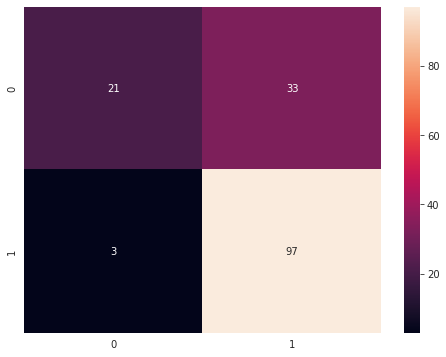

In [545]:
sns.heatmap(confusion_matrix(y_val,y_hat),annot=True,fmt='.0f')

#6. Evaluation

In [546]:
model

['Logistic Regression', 'Random Forest', 'Xgboost']

In [547]:
output=pd.DataFrame({'Model':model,
                    'Accuracy':accuracy,
                    'F1 score':f1})
output

,Model,Accuracy,F1 score
0,Logistic Regression,0.77,0.74
1,Random Forest,0.75,0.73
2,Xgboost,0.77,0.74


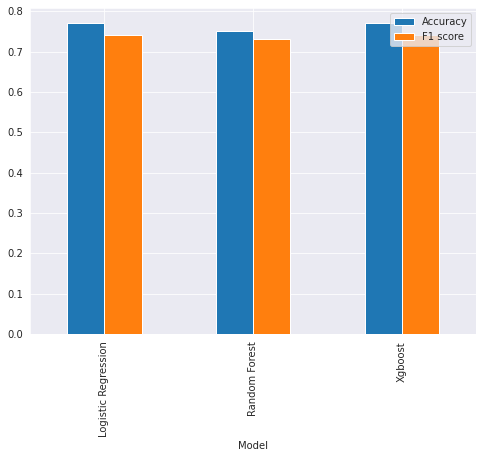

In [548]:
output.plot(x="Model", y=["Accuracy", "F1 score"], kind="bar")

**Dari chart dan list data di atas jelas bahwa Random Forest memberikan skor akurasi dan skor f1 terbaik.**

# **Hyper Parameter**

In [549]:
# Define Parameters

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

# Build the grid search
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_results = grid.fit(x_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df.head()

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best: [0.78916617 0.79779589 0.80219563 0.81303228 0.80646804 0.80431769
 0.81301814 0.81083949 0.81081119 0.80866084 0.79348103 0.80648219
 0.81516849 0.81519679 0.80433183 0.81733299 0.81085363 0.81083949
 0.81518264 0.80651048 0.78908129 0.76735138 0.77612257 0.78694508
 0.78694508 0.78039499 0.80213904 0.78906714 0.80222392 0.79561724
 0.77828707 0.79123164 0.78043743 0.78040913 0.76951589 0.79127409
 0.77603769 0.78036669 0.80215318 0.80213904 0.78258778 0.74557904
 0.78693093 0.76960077 0.77387319 0.78475228 0.78905299 0.76520103
 0.78043743 0.79127409 0.78476643 0.72817814 0.78480887 0.78697338
 0.78254534 0.76960077 0.78912373 0.79125994 0.78042328 0.77823048], using {'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 10}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016565,0.001196,0.002958,0.000111,True,5,auto,5,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",0.772727,0.784314,0.810458,0.789166,0.015781,29
1,0.019447,0.002515,0.004549,0.002114,True,5,auto,6,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",0.811688,0.784314,0.797386,0.797796,0.011179,22
2,0.028234,0.004491,0.004393,0.000965,True,5,auto,7,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",0.792208,0.803922,0.810458,0.802196,0.007550,18
3,0.026898,0.002566,0.005540,0.002711,True,5,auto,8,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",0.818182,0.797386,0.823529,0.813032,0.011277,5
4,0.027629,0.002523,0.004409,0.000136,True,5,auto,9,"{'bootstrap': True, 'max_depth': 5, 'max_featu...",0.831169,0.784314,0.803922,0.806468,0.019213,14


([<matplotlib.axis.YTick at 0x7fa1993dc6d0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

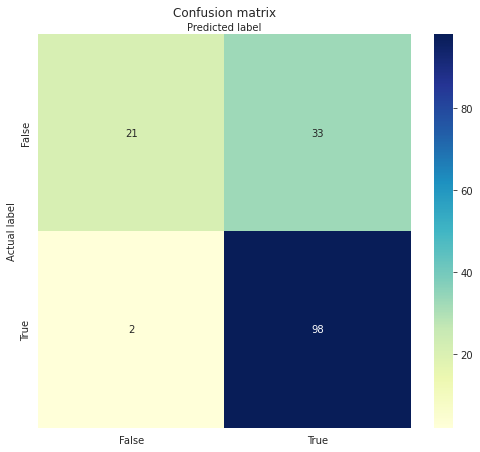

In [550]:
# Extract the best decision forest 
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(x_val)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_val, y_pred)

# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

In [551]:
accuracy.append(np.round(accuracy_score(y_val,y_pred),2))
f1.append(np.round(f1_score(y_val,y_pred,average='weighted'),2))
model.append('Random Forest Hyper Parameter')

In [552]:
output_hyper=pd.DataFrame({'Model':model,
                    'Accuracy':accuracy,
                    'F1 score':f1})
output_hyper

,Model,Accuracy,F1 score
0,Logistic Regression,0.77,0.74
1,Random Forest,0.75,0.73
2,Xgboost,0.77,0.74
3,Random Forest Hyper Parameter,0.77,0.74


Setelah dicoba hyper parameter terdapat kenaikan pada accuracy sebanyak 0.01%

# **Testing model terbaik dengan data Test**

In [553]:
y_pred=rfc.predict(df_test_norm)
y_pred[0:5]

array(['Y', 'Y', 'Y', 'Y', 'N'], dtype=object)

In [554]:
result=pd.DataFrame({'LoanID':df_test_id,
                    'Loan_Status':y_pred})
result.head()

,LoanID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
